# Statistical Inference: Hypothesis test and Analysis of Variance

## Drawing Inferences from Incomplete Data 

Creating accurate predictions is one of the most valuable skills in the job market today. Statisticians, economists, and data scientists use data gathered from specific populations in order to make predictions about what behaviors are likely to occur in the future, or what the truth is about what has already occured. Through computational and statistical techniques, we can make _statistical inferences_ to draw conclusions from data that are often incomplete.

As far as estimations of parameters that already exist, having full population data would mean that our questions about that population are answered. But because the cost of gathering full population would, usually, outweigh the benefit of having perfectly accurate data, we typically use incomplete samples to form inferences. 

## Are Mutual Funds better than Broad-market index funds? 

Financial analysts commonly make use of a variety of techniques to develop statistical inferences. In this lesson, we will use statistical inference to test whether or not managed mutual funds earn better rates of return than the market.

The term “index fund” refers to the investment approach of a fund. Specifically, it is a fund that that aims to match the performance of a particular market index, such as the S&P 500 or Russell 2,000. The index fund simply tries to match the market. This differs from a more actively managed fund, in which investments are picked by a fund manager in an attempt to beat the market. The age old question is: are the fees payed to an actively-managed mutual fund worth it? 

We could simply compare the mean return from a given date range for a mutual fund and compare it to the S&P500s mean return from the same time interval, and see which is higher. But the fact that mutual funds have a finite number of time intervals which we can sample means we cannnot rule out the possibility that higher or lower returns from the fund were a result of random variation, and not an indicator of the true quality of the fund. The S&P500 is , essentially, the market. We know all of the information we need about it, because it isnt a sample. The mutual fund data, on the other hand, is incomplete. So, we need to analyze the two funds using statistical techniques which account for random variation that is possible from incomplete data. 

We would like to ananlyze which(if any) mutual funds have out-performed the market, fees included. To start, we read the CSV downloaded from [Stock Market MBA](https://stockmarketmba.com/listoftop100activelymanagedusstockmutualfunds.php), which shows the 100 largest actively-managed mutual funds in the US. 

## Reading a csv

Mutual funds have ticker symbols, just like stocks. To load the data, we will use the pandas *read_csv()* method. We will select a subset of these funds and use the symbols for selected funds to download data from *Yahoo Finance*. 

In [1]:
import numpy as np
import pandas as pd

mutual_fund_data = pd.read_csv("Top100MutualFunds.csv")
mutual_fund_data

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


We will drop columns that we do not need. To do this, we create a list of column names that we will pass to the dataframe's *.drop()* method.

In [2]:
to_drop = [
     "Category1", "Category2", "Category3", "Morningstar Rating",
    "Current yield", "Action"
]
mutual_fund_data = mutual_fund_data.drop(columns=to_drop)

In [3]:
mutual_fund_data

,Symbol,Name,Morningstar Category,Market cap,Fees
0,AGTHX,American Funds The Growth Fund of America Class A,Large Growth,"$138,592,080,000",0.62%
1,FCNTX,Fidelity Contrafund Fund,Large Growth,"$121,762,870,000",0.74%
2,CWMAX,American Funds Washington Mutual Investors Fun...,Large Blend,"$113,300,000,000",0.63%
3,CWMCX,American Funds Washington Mutual Investors Fun...,Large Blend,"$113,300,000,000",1.40%
4,CWMEX,American Funds Washington Mutual Investors Fun...,Large Blend,"$113,300,000,000",0.87%
...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,Large Growth,"$9,600,000,000",0.51%
96,FDYZX,Franklin DynaTech Fund Advisor Class,Large Growth,"$9,600,000,000",0.62%
97,BBVLX,Bridge Builder Large Cap Value Fund,Large Value,"$9,500,000,000",0.25%
98,PEYAX,Putnam Large Cap Value Fund Class A,Large Value,"$9,393,340,000",0.91%


We select a limited set of symbols by referencing rows 25 through 50 of the symbol column. 

In [4]:
symbols = mutual_fund_data.loc[25:50]["Symbol"]
symbols

25    EAGRX
26    AMRMX
27    FMAGX
28    HACAX
29    FLPSX
30    PRGFX
31    PRNHX
32    DFQTX
33    DFEOX
34    FLPKX
35    RPMGX
36    FOCPX
37    CNGAX
38    CNGCX
39    CNGEX
40    CNGFX
41    FNEFX
42    FOCKX
43    DFLVX
44    CDDRX
45    CDDYX
46    CDIRX
47    CVIRX
48    TWCUX
49    EGFFX
50    EGFIX
Name: Symbol, dtype: object

Now we are ready to download data from *Yahoo Finance*. We select the starting and ending dates using the *datetime* module. We pass this information along with the list of symbols and the specification of "yahoo" as the datasource to the *DataReader* method from the *pandas_datareader* module. 

In [5]:
import pandas_datareader as web
import datetime as dt

mutual_fund_dict = {}
# will only analyze the first 25 funds for now, but this should illustrate how to do it for any fund
start = dt.datetime(1970, 1, 1)
end = dt.datetime.today()
# for symbol in symbols:
    #pull mutual fund data for the longest timeframe avaliable, and cpnvert to monthly percent change data
fund_data = web.DataReader(
    symbols, 'yahoo', start,
    end)  
#     mutual_fund_dict[symbol] = fund_data
fund_data

Attributes  Adj Close                                                         \
Symbols         EAGRX      AMRMX      FMAGX      HACAX      FLPSX      PRGFX   
Date                                                                           
1980-01-02        NaN        NaN   0.111752        NaN        NaN   2.061037   
1980-01-03        NaN        NaN   0.111682        NaN        NaN   2.052252   
1980-01-04        NaN        NaN   0.114788        NaN        NaN   2.075094   
1980-01-07        NaN        NaN   0.116059        NaN        NaN   2.074912   
1980-01-08        NaN        NaN   0.117470        NaN        NaN   2.124098   
...               ...        ...        ...        ...        ...        ...   
2022-05-09  59.970001  49.820000  11.000000  68.360001  48.919998  70.570000   
2022-05-10  60.020000  49.720001  11.060000  68.889999  48.750000  71.120003   
2022-05-11  59.750000  49.410000  10.850000  66.889999  48.299999  69.120003   
2022-05-12  59.650002  49.459999  10.840000  66.879997  48.369999  69.290001   
2022-05-13  60.439999  50.150002  11.190000  69.739998  49.389999  72.290001   

Attributes                                              ... Volume        \
Symbols         PRNHX      DFQTX      DFEOX      FLPKX  ...  FNEFX FOCKX   
Date                                                    ...                
1980-01-02   0.626549        NaN        NaN        NaN  ...    NaN   NaN   
1980-01-03   0.615229        NaN        NaN        NaN  ...    NaN   NaN   
1980-01-04   0.622612        NaN        NaN        NaN  ...    NaN   NaN   
1980-01-07   0.606166        NaN        NaN        NaN  ...    NaN   NaN   
1980-01-08   0.612685        NaN        NaN        NaN  ...    NaN   NaN   
...               ...        ...        ...        ...  ...    ...   ...   
2022-05-09  47.549999  28.299999  31.120001  48.860001  ...    0.0   0.0   
2022-05-10  47.919998  28.320000  31.150000  48.700001  ...    0.0   0.0   
2022-05-11  46.020000  27.860001  30.650000  48.250000  ...    0.0   0.0   
2022-05-12  46.720001  27.930000  30.709999  48.320000  ...    0.0   0.0   
2022-05-13  49.189999  28.559999  31.430000  49.330002  ...    0.0   0.0   

Attributes                                                  
Symbols    DFLVX CDDRX CDDYX CDIRX CVIRX TWCUX EGFFX EGFIX  
Date                                                        
1980-01-02   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1980-01-03   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1980-01-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1980-01-07   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1980-01-08   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...          ...   ...   ...   ...   ...   ...   ...   ...  
2022-05-09   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2022-05-10   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2022-05-11   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2022-05-12   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2022-05-13   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[10684 rows x 156 columns]

The dataframe uses a multiindex for the columns. From this data, we can select the "Adj Close".

In [6]:
close_data = fund_data["Adj Close"]
close_data

Symbols,EAGRX,AMRMX,FMAGX,HACAX,FLPSX,PRGFX,PRNHX,DFQTX,DFEOX,FLPKX,...,FNEFX,FOCKX,DFLVX,CDDRX,CDDYX,CDIRX,CVIRX,TWCUX,EGFFX,EGFIX
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,NaN,0.111752,NaN,NaN,2.061037,0.626549,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,NaN,NaN,0.111682,NaN,NaN,2.052252,0.615229,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,0.114788,NaN,NaN,2.075094,0.622612,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,NaN,NaN,0.116059,NaN,NaN,2.074912,0.606166,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,NaN,NaN,0.117470,NaN,NaN,2.124098,0.612685,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-09,59.970001,49.820000,11.000000,68.360001,48.919998,70.570000,47.549999,28.299999,31.120001,48.860001,...,44.200001,14.40,42.709999,29.49,29.540001,28.969999,29.520000,63.869999,35.419998,37.709999
2022-05-10,60.020000,49.720001,11.060000,68.889999,48.750000,71.120003,47.919998,28.320000,31.150000,48.700001,...,44.590000,14.56,42.650002,29.43,29.469999,28.910000,29.459999,64.570000,35.549999,37.849998
2022-05-11,59.750000,49.410000,10.850000,66.889999,48.299999,69.120003,46.020000,27.860001,30.650000,48.250000,...,43.750000,14.14,42.259998,29.24,29.280001,28.719999,29.270000,62.720001,34.860001,37.110001


We will want to compare the returns on these funds to returns on the S&P 500.  We can create a new column for the S&P 500 and use pandas datareader to download this data from Yahoo Finance.

In [7]:
close_data["S&P 500"] = web.DataReader(
    '^GSPC', 
    'yahoo', 
    start=start,
    end=end)['Adj Close'].iloc[:-1]
close_data

<ipython-input-7-1a5dd441aeaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_data["S&P 500"] = web.DataReader(


Symbols,EAGRX,AMRMX,FMAGX,HACAX,FLPSX,PRGFX,PRNHX,DFQTX,DFEOX,FLPKX,...,FOCKX,DFLVX,CDDRX,CDDYX,CDIRX,CVIRX,TWCUX,EGFFX,EGFIX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,NaN,0.111752,NaN,NaN,2.061037,0.626549,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.760002
1980-01-03,NaN,NaN,0.111682,NaN,NaN,2.052252,0.615229,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.220001
1980-01-04,NaN,NaN,0.114788,NaN,NaN,2.075094,0.622612,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.519997
1980-01-07,NaN,NaN,0.116059,NaN,NaN,2.074912,0.606166,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.809998
1980-01-08,NaN,NaN,0.117470,NaN,NaN,2.124098,0.612685,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.949997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-09,59.970001,49.820000,11.000000,68.360001,48.919998,70.570000,47.549999,28.299999,31.120001,48.860001,...,14.40,42.709999,29.49,29.540001,28.969999,29.520000,63.869999,35.419998,37.709999,3991.239990
2022-05-10,60.020000,49.720001,11.060000,68.889999,48.750000,71.120003,47.919998,28.320000,31.150000,48.700001,...,14.56,42.650002,29.43,29.469999,28.910000,29.459999,64.570000,35.549999,37.849998,4001.050049
2022-05-11,59.750000,49.410000,10.850000,66.889999,48.299999,69.120003,46.020000,27.860001,30.650000,48.250000,...,14.14,42.259998,29.24,29.280001,28.719999,29.270000,62.720001,34.860001,37.110001,3935.179932


We will be using monthly returns to test our hypothesis concerning whether or not index fund returns differ from returns in the general market. First we will change the frequency, then we will calculate monthly returns.

In [8]:
freq = "M"
monthly_close_data = close_data.resample(freq).mean()
monthly_close_data

Symbols,EAGRX,AMRMX,FMAGX,HACAX,FLPSX,PRGFX,PRNHX,DFQTX,DFEOX,FLPKX,...,FOCKX,DFLVX,CDDRX,CDDYX,CDIRX,CVIRX,TWCUX,EGFFX,EGFIX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,NaN,NaN,0.120057,NaN,NaN,2.137847,0.633481,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.868181
1980-02-29,NaN,NaN,0.126545,NaN,NaN,2.206621,0.655251,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.339001
1980-03-31,NaN,NaN,0.114425,NaN,NaN,1.996579,0.588666,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.686191
1980-04-30,NaN,NaN,0.113341,NaN,NaN,1.987904,0.572813,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.966668
1980-05-31,NaN,NaN,0.121511,NaN,NaN,2.078729,0.609724,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.694285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,65.051999,52.183877,13.982500,90.999000,53.067000,95.792000,66.477000,31.724133,35.014910,52.995500,...,18.437500,45.868869,31.272158,31.316617,30.777641,31.311707,80.958500,50.959000,54.177500,4573.815454
2022-02-28,64.688947,51.466384,13.322632,85.759474,52.543684,90.741579,64.046842,30.975381,34.161092,52.477894,...,17.606316,45.269655,30.524259,30.568730,30.029449,30.560774,77.330526,47.446842,50.460527,4435.980494
2022-03-31,64.187391,51.926688,13.086087,82.484782,52.018696,86.339565,60.514783,30.815210,33.964519,51.956956,...,16.976087,45.171794,30.604040,30.650094,30.093277,30.638968,75.447826,45.125652,48.006956,4391.265264


In [9]:
monthly_returns = monthly_close_data.pct_change()
monthly_returns.dropna()

Symbols,EAGRX,AMRMX,FMAGX,HACAX,FLPSX,PRGFX,PRNHX,DFQTX,DFEOX,FLPKX,...,FOCKX,DFLVX,CDDRX,CDDYX,CDIRX,CVIRX,TWCUX,EGFFX,EGFIX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-28,-0.041883,-0.028267,-0.019122,-0.006757,-0.036486,-0.008178,-0.010180,-0.034725,-0.031101,-0.036422,...,-0.012360,-0.037870,-0.029317,-0.029265,-0.029751,-0.029337,-0.013528,-0.007096,-0.006828,-0.030342
2018-03-31,-0.006187,-0.008907,0.000226,0.018397,-0.002341,0.019062,0.037164,0.004762,0.005146,-0.002270,...,0.025925,-0.006504,-0.005089,-0.005006,-0.005547,-0.005117,0.016347,0.027236,0.027575,-0.000880
2018-04-30,0.001042,-0.011042,-0.014032,-0.028904,0.003128,-0.026088,-0.011360,-0.013133,-0.014151,0.003235,...,-0.032210,-0.012393,-0.015174,-0.015137,-0.015585,-0.015184,-0.021547,-0.017547,-0.017144,-0.018185
2018-05-31,0.007067,0.014110,0.023384,0.043511,0.006347,0.032387,0.032243,0.018342,0.020420,0.006432,...,0.050057,0.008395,0.004870,0.004824,0.004226,0.004618,0.038850,0.031847,0.032096,0.018039
2018-06-30,-0.003027,0.011608,0.024232,0.036704,0.013590,0.033955,0.058461,0.023846,0.024853,0.013647,...,0.049338,0.007738,0.013580,0.013690,0.013157,0.013584,0.040418,0.040553,0.040917,0.019567
2018-07-31,-0.002764,0.017577,0.015728,0.004150,-0.004688,0.014517,0.019683,0.008201,0.010554,-0.004605,...,0.013279,0.003458,0.013684,0.013779,0.013285,0.013701,0.018930,0.022713,0.023080,0.014265
2018-08-31,-0.000194,0.019261,0.018164,0.006929,0.000879,0.004346,0.021669,0.022156,0.022514,0.000959,...,0.018609,0.022713,0.028303,0.028359,0.027781,0.028304,0.025527,0.010367,0.010748,0.022973
2018-09-30,0.000127,0.014087,0.014434,0.015742,0.005619,0.005243,0.032602,0.011561,0.014140,0.005692,...,0.014170,0.010369,0.017948,0.017941,0.017430,0.017779,0.015639,0.015004,0.015344,0.015284
2018-10-31,-0.024532,-0.022862,-0.050760,-0.059387,-0.037176,-0.051012,-0.068894,-0.054107,-0.051895,-0.037132,...,-0.064750,-0.041106,-0.027943,-0.027930,-0.028442,-0.027956,-0.051254,-0.057796,-0.057542,-0.039992


<!-- We need to use a different equation to estimate returns. This should be 
### Daily Rate of Return

Derive the daily rate of return from the present value equation.

>$PV = \frac{FV}{(1 + r)^t}$
>
>Overall rate of return: $R=\frac{FV}{PV}$

Discount the overall rate of return to find the average rate of return. We will use this to define the mean of the standard normal distribution:

>$ r = (R)^{\frac{1}{t}} - 1$
>
>$t$ is measured in days -->

## Hypothesis Testing

If we want to draw inferences from our data, we must first develop a testable hypothesis. A testable hypothesis identifies mutually exclusive, falsifiable statements about the data. Only one can be true, and one of them will be true. We create these two hypotheses: 

- The _null_ hypothesis $H_o$: The true means of the the sample populations do not differ.
- The _alternate_ hypothesis $H_a$: The true means of the sample populations do differ.

### 4 Steps of Hypothesis Testing

All hypotheses are tested using a four-step process:

1. State the two hypotheses so that only one can be right. 
2. Formulate an analysis plan, which outlines how the data will be evaluated.
3. Carry out the plan and physically analyze the sample data.
4. Analyze the results and either reject the null hypothesis, or state that the null hypothesis is plausible, given the data.

Hypothesis testing can be done mentally. It would be burdensome to have to state your _null_ and _alternate_ hypotheses, and run through these four steps explicitly every time you made a predictive computer model. The point is that in means testing, there is a clear process and result that deliniates "Yes, the true means of these samples are different" and "No, they're not significantly different"

In the case of us determining the efficacy of an investment strategy, these are our hypotheses: 

- $H_o$: There is no difference between the mutual fund's and S&P500's average monthly return. 
- $H_a$: The mutual funds have a statistically significant and different average monthly return than the S&P500. 

In particular, we would like to know if the returns on index funds are different from and higher than returns earned by the S&P 500.

In [10]:
keys = close_data.keys()
keys

Index(['EAGRX', 'AMRMX', 'FMAGX', 'HACAX', 'FLPSX', 'PRGFX', 'PRNHX', 'DFQTX',
       'DFEOX', 'FLPKX', 'RPMGX', 'FOCPX', 'CNGAX', 'CNGCX', 'CNGEX', 'CNGFX',
       'FNEFX', 'FOCKX', 'DFLVX', 'CDDRX', 'CDDYX', 'CDIRX', 'CVIRX', 'TWCUX',
       'EGFFX', 'EGFIX', 'S&P 500'],
      dtype='object', name='Symbols')

# Comparisons of Means

When dealing with a population of known parameters $\mu$ and $\sigma^2$, we can take any mean $\bar{X}$ gotten from a sample and determine the likelihood that the sample came from out known population, or a population with same mean as our known population. We do this using a z-score: 
<h3 align="center">
    <font size="5">
        $ z = \frac{\bar{X} - \mu}{\sigma}$
    </font>
</h3>

In [11]:
def zscore(data, mu, sigma):
    x_bar = mean(data)
    z = (x_bar - mu) / sigma
    return z

This Z-test asunes that we have access to the population standard deviation and mean _or_ that $n$ is large enough (>30) for $s^2$ and $\bar{x}$ to be used as a reliable estimate for $\sigma^2$ and $\mu$. When these conditions do not hold, and we do not have a large enough sample or sufficient population data, we need another estimator.  

## The T Probability Distribution
When comparing two samples drawn from a population with unknown parameters, we return a t-value(defined below) similar to the z-value, and a corresponding degrees of freedom, indicating the size of our samples. If the size of our samples is high, we can have more confidence in our result. The t-distribution is defined as: 

<h3 align="center">
    <font size="6">
        $ f(T) = \frac{(1 + \frac{T^2}{\nu})^{\frac{-(\nu+1)}{2}}}{B(0.5,0.5\nu)\sqrt(\nu)}$
    </font>
    </h3> 

    
- Where $\nu$ is the degrees of freedom of the distribution and B is the beta function, which is beyond the scope of this book and can be pulled from the scipy.stats library. 
- This is the same distribution shown in the previous chapter; the Cauchy has one degree of freedom and the Standard normal is the form of the t-distribution with more than 30 degrees of freedom

<img src="tdistribution.png">
<h5 align="center">
    <font size="1">
        Figure 1: The T-Distribution
    </font>
    </h5> 

The method acts as the mathematical distribution does. It accepts $t$ and $\nu$ and returns a probability of the t value occuring if there truly was no difference between the the two sample means, or the single sample mean and one hypothesized mean. If we are intereted in knowing the p that the result is only < or >, we take the p value as is. Otherwise, if we are looking for any difference, we multiply it by 2. If the probability returned is too low, then we can reasonably assume that this means that the two means _are not truly different_. This is the core concept of statistical significance. The probability at which a non-significant difference becomes a significant one is known as the alpha value, and is most commonly 0.05. This means that if there is a less than 5 percent probability that the observed difference in means could have happened by chance, we can reasonably assume that the result didnt happen by chance. 

Our first sub-function will implement a _finish_t()_ method that will accept as arguments a t-value(float) and a degrees of freedom(int). This method implements the t-distribution:

In [12]:
from scipy.special import stdtr

# function that allows us to evaluate the t distribution at a given t value and df
def t_finish(t, df):
    
    # pull from t-survival function tail, multiply by 2 to get p that result accounts for < or > 
    # equivalent to p_value = gamma((df+1)/2) / np.sqrt(np.pi*df) * gamma(df/2) * (1+t**2/df)**((df+1)/2)
    p_value = stdtr(df, -np.abs(t)) * 2 
    
    if p_value > .05:
        return_string = "T-value: " + str(t) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
    else:
        return_string = "T-value: " + str(t) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."
        
    return return_string

## T-values

The t-value, returned from the __T-test__ is used when we are dealing with a population of unknown distribution, and would like to compare a given sample mean to one of three options: 

- **One Sample T-test:** The one sample t test compares the mean of your sample data to a known value. For example, we can compare a given funds average monthly return to some arbitrary value, like 7% or 10%. 
<h3 align="center">
    <font size="7">
        $ t = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}}$
    </font>
    </h3> 
    
    
   - Null Hypothesis: sample mean is the same as hypothesized or theoretical mean
   - Alternative Hypothesis: sample mean is different from the hypothesized or theoretical mean

In [13]:
from datlib.stats import *


def ttest_one_sample(data, mu):
    x_bar = mean(data)
    s = SD(data, sample=True)
    n = len(data)
    df = n - 1
    t = (x_bar - mu) / (s / np.sqrt(n))
    return_string = t_finish(t, df)
    

    return return_string

To show the utility of the single-sample t-test, we can check to see if the S&P500's average yearly return was significantly different from some arbitrary value, like 10%. Can we confidently say that the S&P500's return was different from 10%, or could the observed difference have been due to random variation? 

In [14]:
ttest_one_sample(monthly_returns["S&P 500"].dropna(), .01)

'T-value: -1.3838059436803647, P-value: 0.16702677971517677, Fail to reject null hypothesis.'

We can test our results vs the SciPy library's one sample t test: 

In [16]:
import scipy.stats as stats

In [17]:
stats.ttest_1samp(monthly_returns["S&P 500"].dropna(), .01 )#,alternative = "less")

Ttest_1sampResult(statistic=-1.383805943680366, pvalue=0.16702677971517638)

From the test, we fail to reject our null hypothesis that the average yearly S&P500 gain was not significantly different from 10%. 

- **Independent Samples T-test:** The The independent samples t test (also called the unpaired samples t test) is the most common form of the T test. It helps you to compare the means of two sets of data. Normally, we are checking to see if the means of the data are significantly different from a differnece of zero. But , we can also check if they are significantly different from a hypothesized or theoretical value. For instance, say we had two groups of males and one group of females and we wanted to compare average heights between the groups. For the males, we would check to see if they differed significantly from an average height difference of zero, whereas when comparing the males to the females we may want to see if they were significantly different from an average difference of 2 inches, or whatever the average height between males and females is. **This hypothesized difference, $(\mu_1 - \mu_2)$, will usually be zero, but not always.**

<h3 align="center">
    <font size="7">
        $ t = \frac{(\bar{x_1}-\bar{x_2})-(\mu_1 - \mu_2)}{\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}}$
    </font>
    </h3> 
    
   
   - Note that this t-test is one variation of the independent samples t-test that _does not_ assume equal variance between the samples
   
    - Null Hypothesis: sample mean is the same as hypothesized or theoretical mean
    - Alternative Hypothesis: sample mean is different from the hypothesized or theoretical mean
    

In [18]:
# independent samples t-test, setting equal_var=True will turn this test into a paired samples t-test where equal variance
# is assumed
def ttest_ind_samp(a,
                   b,
                   hypothesized_difference=0,
                   equal_var=False,
                   show_distributions=True):
    s1 = variance(a)
    s2 = variance(b)
    n1 = len(a)
    n2 = len(b)
    # if paired samples, df calculation is different
    if (equal_var):
        df = n1 + n2 - 2
        svar = ((n1 - 1) * s1 + (n2 - 1) * s2) / float(df)
        denom = np.sqrt(svar * (1.0 / n1 + 1.0 / n2))
    else:
        vn1 = s1 / n1
        vn2 = s2 / n2
        df = ((vn1 + vn2)**2) / ((vn1**2) / (n1 - 1) + (vn2**2) / (n2 - 1))
        denom = np.sqrt(vn1 + vn2)

    x_bar1 = np.mean(a)
    x_bar2 = np.mean(b)
    d = np.mean(a) - np.mean(b) - hypothesized_difference
    t = d / denom
    return_string = t_finish(t, df)
    
    if(show_distributions): 
        show_t_distributions(a, b)

    return return_string

- **Paired Samples T-test:** A paired t test (also called a correlated pairs t-test, a paired samples t test or dependent samples t test) is where you run a t test on dependent samples. Dependent samples are essentially connected — they are tests on the same person or thing. This would be useful if we chose a random sample of stores and measured their mean revenues before and after implementation of the new marketing campaign as our two means. For our function, we can simply add an optional argument "equal_var" to our independent t-test funtion which will cause it to act like a paired samples t-test. 

We can plot the distributions as part of the test so that the function user get a visualization of how the distributions line up. This function was used in the t test functions we just made. 

In [20]:
def show_t_distributions(a, b): 
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    a.plot.kde(ax=axs[0],
                   label="Group1 distribution",
                   legend=True,
                   color='b')
    a.plot.hist(ax=axs[0], bins=5, density=True, alpha=0.1, color='b')
    b.plot.kde(ax=axs[0],
                   label="Group2 distribution",
                   legend=True,
                   color='r')
    b.plot.hist(ax=axs[0], bins=5, density=True, alpha=0.1, color='r')

    dataframe = pd.DataFrame(columns=["Group1", "Group2"])
    dataframe["Group1"] = a
    dataframe["Group2"] = b
    dataframe.boxplot(grid=False, ax=axs[1])

##### np.linspace() function: The linspace() function returns evenly spaced numbers over a specified interval (start, stop, num). It is very similar to the np.arange() function. This will give us an array of points to plug into our t-density function. When we plot the points, it will appear as a smooth line because we will use 10000 points. 

In [21]:
import datlib.stats
import scipy.special as sc
import scipy.stats as stats

# define a function to create the actual distribution from which we can analyze our t value from the t test
def create_t_distribution(df):
    x = np.linspace(-5, 5, 10000)  # large number of points will ensure accuracy
    # transform flat array of x values into t distribution
    t_distribution = ((1 + x**2 / df)
                      **(-(df + 1) / 2)) / (sc.beta(.5, .5 * df) * np.sqrt(df))
    return t_distribution

##### T Distributions
All of the t-distributions below are normal distributions. As the degrees of freedom increases past 30 or so, the distribution becomes the _standard normal distribution_( Central Limit Theorem), which has a standard deviation of 1 and mean of 0, and we use z-scores to analyze this. 

__The $t$ value tells us how many standard deviations away from the mean our sample sits on a $t$ distribution of the _differences_ of these two means, where the mean of the distribution is zero.__
The t-distribution changes based on sample size, as increased sample size allows for higher _degrees of freedom_, which are defined for two samples as: 

- $df = (N_1 + N_2)  – 2$

And for a single sample as: 

- $df = N - 1$

We now implement the theory into code: 

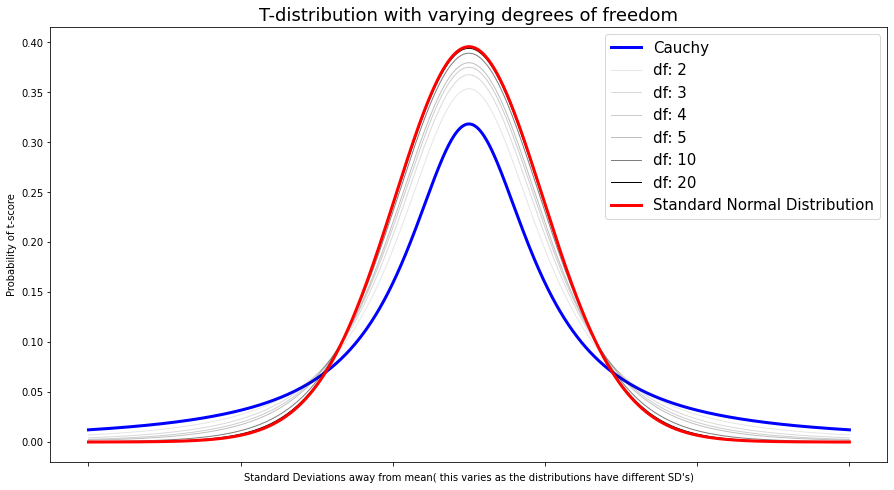

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
cauchy = create_t_distribution(1)
ax.plot(cauchy, '-', lw=3, alpha=1, label="Cauchy", color='b')
t_df = [2, 3, 4, 5, 10, 20]
for df in t_df:
    dist = create_t_distribution(df)
    ax.plot(dist, '-', lw=1, alpha=df / 20, label="df: " + str(df), color='k')
gaussian = create_t_distribution(30)
ax.plot(gaussian,
        lw=3,
        alpha=1,
        color='r',
        label='Standard Normal Distribution')
plt.rcParams.update({"font.size": 15})
ax.set_ylabel("Probability of t-score")
ax.set_xlabel(
    "Standard Deviations away from mean( this varies as the distributions have different SD's)"
)
plt.title("T-distribution with varying degrees of freedom")
ax.set_xticklabels(labels="")
plt.legend()
# plot various lines and label them with text to outline where the standard deviatios occur on normal distributions
#plt.axvline(x=0, c='r', linestyle='--', lw=2)
#plt.axvline(x=1, ymax=.6, c='b', linestyle='--', lw=2, alpha=.3)
#plt.axvline(x=-1, ymax=.6, c='b', linestyle='--', lw=2, alpha=.3)
#plt.axvline(x=2, ymax=.3, c='b', linestyle='--', lw=2, alpha=.3)
#plt.axvline(x=-2, ymax=.3, c='b', linestyle='--', lw=2, alpha=.3)
#plt.text(-.004, .25, 'μ', c='r', size=40)
#plt.text(1 + .001, .15, 'σ', c='b', size=20)
#plt.text(-1 - .008, .15, '-σ', c='b', size=20)
#plt.text(2 + .001, .08, '2σ', c='b', size=20)
#plt.text(-2 - .02, .08, '-2σ', c='b', size=20)
plt.show()

### T-distribution p-value

As we can see, a lower sample size, and hence a lower degrees of freedom, leads to a lower probaility that our t-score is near 0 when our population means are the same, because more random variation is likely when the sample size is so low. The point of a t-score is to determine if the difference in the two means of the samples is too drastic for the true population means to be the same. As we approacch 30 with our degrees of freedom, the graph doesnt change much, and this is a standard normal distribution, which the z-score uses. That is why we use z-score for large sample sizes. 

Once we get our t-score based on the t-distribution, shown on the x-axis of the above graph, we get a corresponding __p-value__, shown on the y-axis. This value is the probability of our gotten t-value if the true means were the same. 

- If the corresponding p-value from our t-value is too low, we choose to __reject the null hypothesis $H_o$__, and say that our samples come from different populations who's means are different. This is a "statistically significant" result. 


- If the p-value is sufficiently high, we __fail to reject the null hypothesis $H_o$__, and say that there is a high enough chance that the samples came from populations with the same means. This is a "statistically insignificant" result. 


- The value at which a non-significant result becomes a significant one is called the __*critical value*__, denoted $\alpha$, and is most commonly 0.05.

Now, w can compare some funds monthly return performance to the S&P500's monthly return performance using the t-test, comparing our version to the SciPy version to ensure accuracy: 

In [23]:
i = 0
for key in monthly_returns.keys():
    test_df = monthly_returns[[key, "S&P 500"]].dropna()
    print("\n" + key + ": ")
    print(stats.ttest_ind(monthly_returns[key].dropna(), monthly_returns["S&P 500"].dropna()))
    i += 1
    if i == 7:
        break


EAGRX: 
Ttest_indResult(statistic=-0.6918962408709819, pvalue=0.4892902801885317)

AMRMX: 
Ttest_indResult(statistic=-0.13158335487790918, pvalue=0.8953419493818136)

FMAGX: 
Ttest_indResult(statistic=0.8952803392106858, pvalue=0.3708497156938948)

HACAX: 
Ttest_indResult(statistic=0.5379288313629041, pvalue=0.5907564260818413)

FLPSX: 
Ttest_indResult(statistic=1.3175111026777706, pvalue=0.1880045274660275)

PRGFX: 
Ttest_indResult(statistic=0.02097288730923364, pvalue=0.9832714098336895)

PRNHX: 
Ttest_indResult(statistic=0.8221726717307241, pvalue=0.4111719131403956)



EAGRX: 
T-value: -0.5650228744313627, P-value: 0.5733660583193942, Fail to reject null hypothesis.

AMRMX: 
T-value: -0.00332771159981242, P-value: 0.9973456799442735, Fail to reject null hypothesis.

FMAGX: 
T-value: 0.8961628237415602, P-value: 0.37038882439919096, Fail to reject null hypothesis.

HACAX: 
T-value: 0.6131355792035291, P-value: 0.5399660210379749, Fail to reject null hypothesis.

FLPSX: 
T-value: 1.5418317076232826, P-value: 0.12352432147921573, Fail to reject null hypothesis.


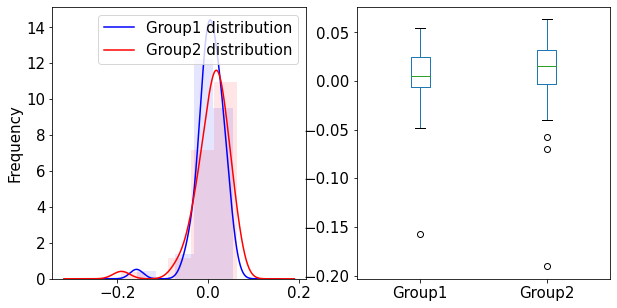

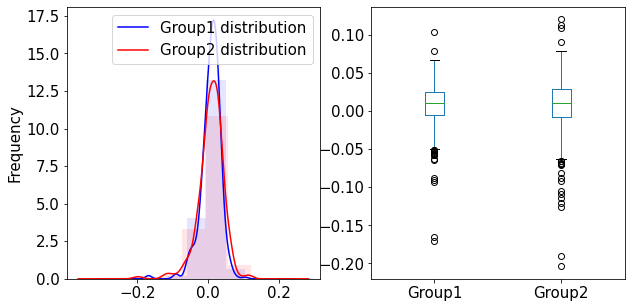

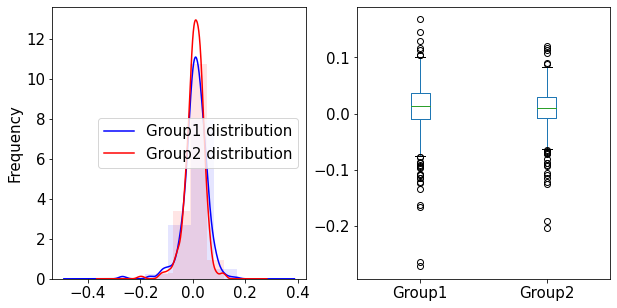

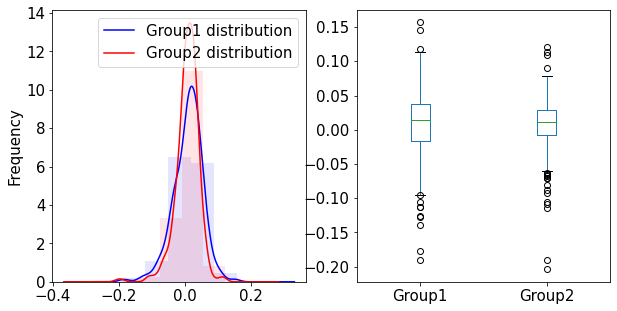

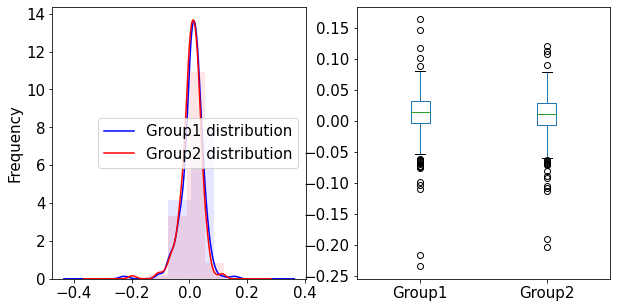

In [24]:

for key in monthly_returns.keys()[0:5]:
    print("\n" + key + ": ")
    test_df = monthly_returns[[key, "S&P 500"]].dropna()
    print(ttest_ind_samp(test_df[key], test_df["S&P 500"], show_distributions=True))
    

# ANOVA 

While using T-tests and Z-tests to analyze means of groups, we were restricted to only being able to compare two groups at a time. What if we wanted to see of there was significant differences between more than two groups? The **ANOVA**, or **Analysis of Variance** techniques allow us to test the null hypothesis that there is no significant difference between $k$ (some integer larger than 2) groups. 

- $H_o$: $\mu_1 = \mu_2 = \cdots = \mu_k$
- $H_a$: At least two of the means are not equal. 

### Assumptions needed for ANOVA
There are three assumptions that must be met in order to carry out an ANOVA test: 

1. The experimental errors of yoyr data are normally distributed
2. Homoscedasticity - the variances of your factors are all roughly the same (and at least follow the same distribution)
3. Samples are independent - Selection of one sample had no effect on any other sample

### F-Statistic
The distribution used for the hypothesis test is a new one. It is called the F distribution, named after Sir Ronald Fisher, an English statistician. The F-statistic is a ratio. There are two sets of degrees of freedom; one for the numerator and one for the denominator. 

The F distribution is derived from the t-distribution. The values of the F distribution are squares of the
corresponding values of the t-distribution. One-Way ANOVA expands the t-test for comparing more than two groups.
The scope of that derivation is beyond the level of this textbook. 

To calculate the F ratio, two estimates of the variance are made:

1. **Variance between samples**: An estimate of $\sigma^2$ that is the variance of the sample means multiplied by n (when the sample sizes are the same.). If the samples are different sizes, the variance between samples is weighted to account for the different sample sizes. The variance is also called **variation due to treatment or explained variation.**

2. **Variance within samples**: An estimate of $\sigma^2$ that is the average of the sample variances (also known as a pooled variance). When the sample sizes are different, the variance within samples is weighted. The variance is also called **the variation due to error or unexplained variation.**

- $SS_b$ = the sum of squares that represents the variation among the different samples

- $SS_w$ = the sum of squares that represents the variation within samples that is due to chance.

To find a "sum of squares" means to add together squared quantities that, in some cases, may be weighted. We used sum of squares to calculate the sample variance and the sample standard deviation. 

MS means "mean square." $MS_b$ is the variance between groups, and $MS_w$ is the variance within groups. These measurements are the total sum of squares of their variances divided by the degrees of freedomom of the measure to give a mean value. 

### Caluculating the F-Statistic

- $k$ = the number of different groups
- $n_j$ = the size of the $j^{th}$ group
- $\bar{x_j}$ = the mean of the $j^{th}$ group
- $\bar{x}$ = the grand mean of all values 
- $N$ = total number of all the values combined (total sample size: $\sum{n_j}$)
- $x_i$ = one value: 

- Explained variation: sum of squares representing variation among the different samples:

    - $SS_{b} = \sum_{j = 1}^{k}{n_j(\bar{x_j} - \bar{x})^2}$

In [25]:
def SSB(*args):
    args = [arg for arg in args]
    ssb = 0
    alldata = np.concatenate(args)
    grand_mean = np.mean(alldata)
    for arg in args: 
        group_mean = np.mean(arg)
        n = len(arg)
        val = n*((group_mean - grand_mean)**2)
        ssb += val

    return ssb

- Unexplained variation: sum of squares representing variation within samples:

    - $SS_w = \sum_{j = 1}^{k}{\sum_{i = 1}^{n_j}{(x_i - \bar{x_j})^2}}$

In [26]:
def SSW(*args):
    args = [arg for arg in args]
    ssw = 0
    for arg in args: 
        group_mean = np.mean(arg)
        val = np.sum((arg - group_mean)**2)
        ssw += val
    return ssw

- Total variation across the dataset: 

    - $SS_t = SS_b + SS_w$
 
 
- We also now create and describe one grand funtion we can call to return all necessary sum square statistics: 

In [27]:
def get_sum_square_stats(*args): 
    """
    Parameters
    ----------------------
    args: array-like
        list of groups to be analyzed. 
        
    Returns
    ------------------
    ssw: float
        Sum-of-squares within the arguments. Tells us how much of the variation
        is due to within-argument variation. 
    
    ssb: Sum-of-squares between arguments. Tells us how much of the variation 
        of the groups is from between-group variation. 
    
    sst: Total sum of squares variation for the list of groups. Tells us how much 
        the samples vary in total. 
        sst = ssw + ssb
    """
    ssw = SSW(*args)
    ssb = SSB(*args)
    sst = ssb + ssw
    return ssw, ssb, sst

- $df$'s for the numerator(between samples): $df_b = k – 1$
- $df$'s for the denominator($df$'s within samples): $df_w = k – 1$

In [28]:
def get_anova_counts(args): 
    """
    Parameters
    ----------------------
    args: array-like
        list of groups to be counted. 
        
    Returns
    ------------------
    k: int
        number of groups 
    N: int
        total number of observations across all groups
    dfbn: int
        degrees of freedom between arguments; k - 1
    dfwn: int
        degrees of freedom within arguments; n - 1
    """
    k = len(args)
    N = 0
    for i in range(k):
        N += len(args[i])
    dfbn = k - 1
    dfwn = N - k
    
    return k, N, dfbn, dfwn




The one-way ANOVA test depends on the fact that $MS_b$ can be influenced by population differences among means of the several groups. Since $MS_w$ compares values of each group to its own group mean, the fact that group means might
be different does not affect $MS_w$. The null hypothesis says that all groups are samples from populations having the same normal distribution. The alternate
hypothesis says that at least two of the sample groups come from populations with different normal distributions. If the null hypothesis is true, $MS_b$ and $MS_w$ should both estimate the same value. 

Finally, we arrive at the **F-Statistic**, which will function for us as the T-Statistic did earlier this chapter, as an input into its density function to recieve a p-value telling us the likelihood of its occurence if our null hypothesis was true. 

- $ F = \frac{MS_b}{MS_w}$

With a density function:
<h3 align="center">
    <font size="5">
        $ f(x, df_1, df_2) = \frac{df_2^{df_2/2} df_1^{df_1/2} x^{df_1 / 2-1}}
                        {(df_2+df_1 x)^{(df_1+df_2)/2}
                         \beta(df_1/2, df_2/2)}$
    </font>
    </h3> 



where $df_1$ and $df_2$ are the
shape parameters and
$\beta$ is the beta function.  The formula for the beta function
is
<ul>
$B(a, b) = \int_0^1 t^{a-1}(1-t)^{b-1}dt
        = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$,
 
<p>where <span class="math notranslate nohighlight">\(\Gamma\)</span> is the gamma function.</p>
    
These funtions could be implememnted manually using basic math symbols, but for our purposes, importing them from Scipy will be much more pragmatic. 
    
In a testing context, the F distribution is treated as  "standardized distribution" (i.e., no location or scale parameters).
However, in a distributional modeling context (as with other probability distributions), the F distribution itself can be
transformed with a <a href="eda364.htm">location parameter</a>, $\mu$, and a <a href="eda364.htm">scale parameter</a>, $\sigma$.
<p>

We will create a function that accepts our f-value, calculated in the anova function, along with the DF's and returns the p-value and an interpretation of it. 

In [29]:
from scipy.stats import f as f_dist

def show_distributions(args): 
    anova_df = pd.DataFrame(args)
        #for i in range(k):
         #   arg_df = pd.DataFrame(args[i])
          #  pd.merge(anova_df, arg_df, left_index=False)
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        
    i = 1
    for arg in args:
        arg_df = pd.DataFrame(arg)
        arg_df.plot.kde(ax=axs[0], legend=False)
        arg_df.plot.hist(ax=axs[0], bins=15,legend = False, label="Group "+str(i)+ " distribution", density=True, alpha=0.1)
        i+=1
       
        
        anova_df.transpose().boxplot(grid=False, ax = axs[1])

def finish_anova(f, dfbn, dfwn): 
     """
    Parameters
    ----------------------
    f: float
         calculated f-value. 
         f = mean-square-between groups / mean-square-within groups
         The f-value is the ratio of how much variation is between versus within groups. 
         If the groups means were the same, the between group variation would be zero. 
         As the f-value grows, the more dissimilar the groups means are. 
    dfbn: int
        Degrees of freedom between groups passed to ANOVA funtion. 
    dfwn: int
        Degrees of freedom within groups. 
        
    Returns
    ------------------
    p: float
        p-value calculated from passing gotten f-value and df's into the f-density funtion from scipy. 
        could attempt to manually implement, i.e
        [f(x, df_1, df_2) = (df_2^{df_2/2} df_1^{df_1/2} x^{df_1 / 2-1} / 
        [{(df_2+df_1 x)^{(df_1+df_2)/2}*sc.beta(df_1/2, df_2/2)}\]
        
    return_string: String
        Specifies whether gotten p value implies rejecting or failing to reject the null hypothesis. 
    
    """
    # use scipy to plug f-value into f distribution to return p-value
     p_value = f_dist.sf(dfbn, dfwn, f)
    
     if p_value > .05:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
     else:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."

     return return_string

# return f, p

Finally, we create the anova function, which calls all of the functions we just made. It accepts the groups to be compared and returns the results of the anova test. 

- Mean square (variance estimate) explained by the different groups:
$MS_b = \frac{SS_b}{df_b} = \frac{SS_b}{k-1}$
- Mean square (variance estimate) that is due to chance (unexplained): $MS_w = \frac{SS_w}{df_w} = \frac{SS_w}{n - k}$
- $ F = \frac{MS_b}{MS_w}$



This function has been drastically simplified due to the creation of the subfunctions within it. 

In [30]:
# use *args command to accept variable number of arguments
def anova(*args, _show_distributions = True):
    
    k, N, dfbn, dfwn  = get_anova_counts(args)
    
    ssw, ssb, sst = get_sum_square_stats(*args)

    msb = ssb / float(dfbn)
    msw = ssw / float(dfwn)
    f = msb / msw
    
    
    if(_show_distributions):
        show_distributions(args)

    return finish_anova(f, dfbn, dfwn)

Now that we have built our function, we can test it. In the case of our mutual fund analysis, a relevant ANOVA problem would be comparing mean returns across the categorical variable of fund category. In one of our data columns, "Morningstar Category", Morningstar provides categorizations of funds based of what they focus on. Does one specialization do better than the others? Should investors choose one category of fund over the others? 

In [31]:
# find what categories are listed in our dataset:
fund_types = mutual_fund_data["Morningstar Category"].unique()
fund_types

array(['Large Growth', 'Large Blend', 'Large Value', 'Mid-Cap Value',
       'Mid-Cap Growth', 'Health', 'Mid-Cap Blend', 'Communications',
       'Small Value'], dtype=object)

In [32]:
# create lists of categories to be analyzed and pull mean yeary returns for each category
fund_type_returns_dict = {}
for ftype in fund_types:
    fund_type_returns_dict[ftype] = []
    for i in range(25, 50):
        if mutual_fund_data["Morningstar Category"][i] == ftype:
            fund_type_returns_dict[ftype].extend(
                monthly_returns[mutual_fund_data["Symbol"][i]].dropna())

In [33]:
mutual_fund_data["Morningstar Category"]

0     Large Growth
1     Large Growth
2      Large Blend
3      Large Blend
4      Large Blend
          ...     
95    Large Growth
96    Large Growth
97     Large Value
98     Large Value
99    Large Growth
Name: Morningstar Category, Length: 100, dtype: object

In [35]:
fund_type_returns_dict.keys()

dict_keys(['Large Growth', 'Large Blend', 'Large Value', 'Mid-Cap Value', 'Mid-Cap Growth', 'Health', 'Mid-Cap Blend', 'Communications', 'Small Value'])

There are almost no funds with the last 5 categories so we will just do the analysis on the first 4. 

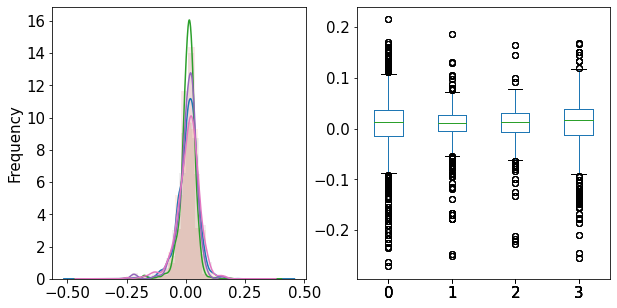

In [36]:
args = [fund_type_returns_dict["Large Growth"],
fund_type_returns_dict['Large Value'],
fund_type_returns_dict['Large Blend'],
fund_type_returns_dict['Mid-Cap Growth']]
show_distributions(args)

'F-value: 0.3705108499070738, P-value: 0.6411727396096806, Fail to reject null hypothesis.'

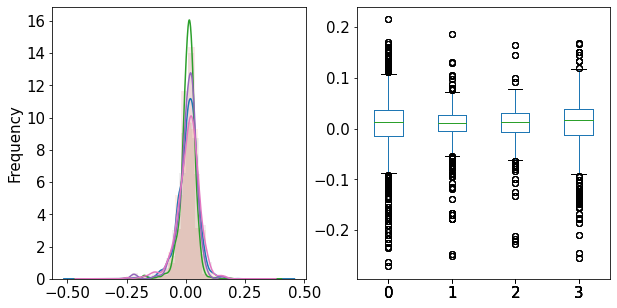

In [38]:
anova(fund_type_returns_dict["Large Growth"],
      fund_type_returns_dict['Large Value'],
      fund_type_returns_dict['Large Blend'],
      fund_type_returns_dict['Mid-Cap Growth'])

Compare to equivalent SciPy function: 

In [39]:
stats.f_oneway(fund_type_returns_dict["Large Growth"],
               fund_type_returns_dict['Large Value'],
               fund_type_returns_dict['Large Blend'],
               fund_type_returns_dict['Mid-Cap Growth'])

F_onewayResult(statistic=0.37051084990707406, pvalue=0.7742931817740009)

These results suggest that almost all of the total variance in the data is caused by within-data variance, not between-data variance. The practical interperetation is that the type of mutual fund does not significantly change yearly returns. This result may support the EMH because specific specialization of funds has no effect on returns. The market gave the same returns to the funds no matter their specialization. 